In [137]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

In [138]:
iris = datasets.load_iris()

In [139]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [140]:
x = iris.data[:,(2,3)]  #petal length petal width
y = (iris.target == 2).astype(np.float64)  #Iris virginica

In [142]:
# 流水线
svm_clf = Pipeline([
    ("scaler",StandardScaler()),
    ("linear_svc" , SVC(kernel='linear',C=1,random_state= 0))
])

In [143]:
svm_clf.fit(x,y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('linear_svc', SVC(C=1, kernel='linear', random_state=0))])

In [144]:
svm_clf.predict([[5.5,1.7]])

array([1.])

In [145]:
svm_clf.predict(x)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.,
       1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [146]:
from sklearn.metrics import accuracy_score

In [147]:
# 准确率
accuracy_score(y,svm_clf.predict(x))

0.9533333333333334

In [148]:
#查看流水线中的参数
w = svm_clf.named_steps['linear_svc'].coef_.reshape(2)
b = svm_clf.named_steps['linear_svc'].intercept_

In [181]:
a = -w[0] / w[1]
xx = np.linspace(-2,3)
yy = a*xx - b[0] / w[1]

In [182]:
x0 = x[y == 0.]
x1 = x[y== 1.]
y0 = y[y== 0.]
y1 = y [y ==1.]

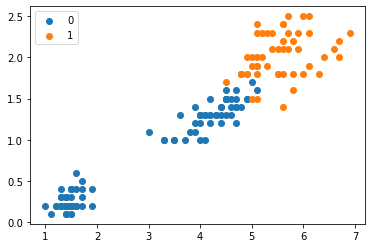

In [183]:
plt.figure()
plt.scatter(x0[:,0],x0[:,1],label = '0')
plt.scatter(x1[:,0],x1[:,1],label = '1')
plt.legend()

In [184]:
x00 = svm_clf.named_steps['scaler'].fit_transform(x)[y ==0.]
x11 = svm_clf.named_steps['scaler'].fit_transform(x)[y ==1.]

In [185]:
xlim = ax.get_xlim()
ylim = ax.get_xlim()

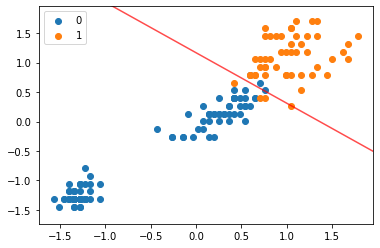

In [192]:
plt.scatter(x00[:,0],x00[:,1],label = '0')
plt.scatter(x11[:,0],x11[:,1],label = '1')
a = plt.gca()
xlim = a.get_xlim()
ylim = a.get_xlim()

plt.plot(xx,yy,c = 'r',alpha = 0.7)
a.set_xlim(xlim)#设置x轴取值
a.set_ylim(ylim)
plt.legend()

In [158]:
sup = svm_clf.named_steps['linear_svc'].support_vectors_

In [157]:
svm_clf.named_steps['linear_svc'].n_support_

array([13, 13], dtype=int32)

In [166]:
svm_clf.named_steps['linear_svc'].decision_function(x)

array([ 0.56983832,  0.56983832,  0.36048624,  0.77919039,  0.56983832,
        1.68639894,  0.81409051,  0.77919039,  0.56983832,  0.53493819,
        0.77919039,  0.98854247,  0.32558612, -0.30247011,  0.15113417,
        1.26769479,  0.84899064,  0.81409051,  1.44214674,  1.02344259,
        1.19789454,  1.26769479, -0.26756999,  1.93065114,  1.61659869,
        0.98854247,  1.47704686,  0.77919039,  0.56983832,  0.98854247,
        0.98854247,  1.26769479,  0.53493819,  0.56983832,  0.77919039,
        0.15113417,  0.36048624,  0.32558612,  0.36048624,  0.77919039,
        0.60473844,  0.60473844,  0.36048624,  1.96555126,  2.10510309,
        0.81409051,  0.98854247,  0.56983832,  0.77919039,  0.56983832,
       10.40948319, 10.23503124, 11.07243954,  8.69976646, 10.44438331,
        9.74652684, 10.89798759,  6.50154534,  9.95587891,  8.73466659,
        6.92024949,  9.60697501,  7.96700987, 10.40948319,  7.86235816,
        9.78142696, 10.23503124,  8.17636194, 10.23503124,  8.00

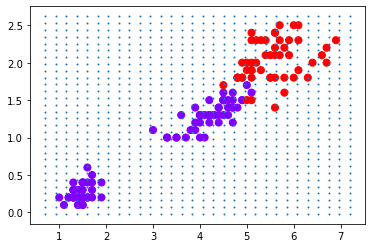

In [170]:
plt.scatter(x[:,0],x[:,1],c=y,s=50,cmap="rainbow")
ax = plt.gca() #获取当前的子图，如果不存在，则创建新的子图
xlim = ax.get_xlim()
ylim = ax.get_ylim()
#在最大值和最小值之间形成30个规律的数据
axisx = np.linspace(xlim[0],xlim[1],30)
axisy = np.linspace(ylim[0],ylim[1],30)
 
axisy,axisx = np.meshgrid(axisy,axisx)
#我们将使用这里形成的二维数组作为我们contour函数中的X和Y
#使用meshgrid函数将两个一维向量转换为特征矩阵
#核心是将两个特征向量广播，以便获取y.shape * x.shape这么多个坐标点的横坐标和纵坐标
 
xy = np.vstack([axisx.ravel(), axisy.ravel()]).T
#其中ravel()是降维函数，vstack能够将多个结构一致的一维数组按行堆叠起来
#xy就是已经形成的网格，它是遍布在整个画布上的密集的点
plt.scatter(xy[:,0],xy[:,1],s=1,cmap="rainbow")

In [172]:
#计算超平面方程wx+b=0
b=classifier.intercept_
w=classifier.coef_
xx = np.arange(min(x1),max(x1),1)
yy = np.arange(min(y1),max(y1),1)
X, Y = np.meshgrid(xx, yy)
Z1= -w[0,0]/w[0,2]*X-w[0,1]/w[0,2]*Y-b[0]/w[0,2]
Z2 = -w[1,0]/w[1,2]*X-w[1,1]/w[1,2]*Y-b[1]/w[1,2]
Z3 = -w[2,0]/w[2,2]*X-w[2,1]/w[2,2]*Y-b[2]/w[2,2]
#绘图
#设置默认字体
mpl.rcParams['font.sans-serif'] = [u'SimHei']
mpl.rcParams['axes.unicode_minus'] = False
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
#画散点图
ax.scatter(x11,y11,z11,'r',marker='o',label='label_1')
ax.scatter(x22,y22,z22,'g',marker='*',label='label_2')
ax.scatter(x33,y33,z33,'b',marker='^',label='label_3')
#绘制超平面,alpha为设置平面透明度
ax.plot_surface(X,Y,Z1,alpha=0.6)
# ax.plot_surface(X,Y,Z2,alpha=0.6,)
ax.plot_surface(X,Y,Z3,alpha=0.6)
#设置轴标签
ax.set_xlabel("特征1",fontsize=10)
ax.set_ylabel("特征2",fontsize=10)
ax.set_zlabel("特征3",fontsize=10)
#设置图例
ax.legend(loc='best')
#保存图片
plt.savefig("Result.png")


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [189]:
xlim

(0.0, 1.0)

In [190]:
ylim

(0.0, 1.0)